# **1. Setup**

**1.1 Install Dependencies**

In [1]:
# Install Tensorflow and other staff into environment
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached matplotlib-3.7.0-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-9.4.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\dmuth\AppData\Local\Temp\pip-install-per82rmb\tensorflow-gpu_8991dd088d224690a32e8a31e5ada7e4\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

**1.2 Import Dependencies**

In [3]:
# Import standard dependencies
import cv2
import os # For create folder structure
import random
import numpy as np
from matplotlib import pyplot as plt # Visualization images

In [17]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
# Layer class - provides a set of methods and attributes that are common to all layers
# Conv2D - That allows to perform a convolution 
# Dense - Fully connected layer
# MaxPooling2D - Pull all layers together/ Effectively reduce how much data passing through to the next layer 
# Input - That allows to input data
# Flatten - Take all the information from the previous layer and flattens it down into single dimension
import tensorflow as tf

**1.3 Set GPU Growth**

In [18]:
# Avoid out of memory errors by setting GPU Memory Consumption Growth
# Access all the different GPUS on the actual machine
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [19]:
for gpu in gpus:
    print(gpu)

**1.4 Create Folder Structures**

In [20]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [ ]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# **2. Collect Positives and Anchors**

**2.1 Untar Labelled Faces in the Dataset**

In [8]:
# Uncompress Tar GZ Labelled Faces in the Dataset
!tar -xf lfw.tgz

In [9]:
# Go through the all folders in the lfw folder and move all LFW images to the "data/negative" repository

for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        # Define the existing path
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [7]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

**2.2 Collect Positives and Anchors**

In [8]:
# Import uuid library to generate unique image names
import uuid # Uniformed unique identifier

In [22]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\5c5d310d-bf26-11ed-a6bc-3c2c30ba9cd2.jpg'

In [11]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(1)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image(400)
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image(300)
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [ ]:
plt.imshow(frame[120:120+250,200:200+250, : ])

# **3. Load and Preprocessed Images**

**3.1 Get Image Directories**

In [28]:
# Grab the 300 image from the anchor path with using generator to be able to loop
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)

# Grab the 300 image from the positive path with using generator to be able to loop
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)

# Grab the 300 image from the negative path with using generator to be able to loop
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [29]:
dir_test = anchor.as_numpy_iterator()

In [40]:
# Whole path of the specific directory
dir_test.next()

b'data\\anchor\\c88dcc99-bf24-11ed-90ce-3c2c30ba9cd2.jpg'

**3.2 Preprocessing - Scale and Resize**

In [80]:
def preprocess(file_path):
    
    # Read an image from file path
    byte_img = tf.io.read_file(file_path)

    # Load   the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    
    # Scale image to be between 0 and 1 
    img = img / 255.0

    return img

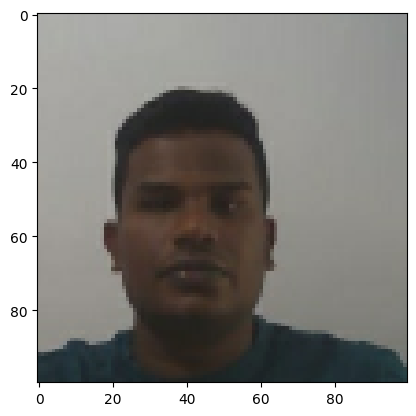

In [81]:
img = preprocess('data\\anchor\\c88dcc99-bf24-11ed-90ce-3c2c30ba9cd2.jpg')
plt.imshow(img)

**3.3 Create Labelleed Dataset**

In [82]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))) 
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [83]:
samples = data.as_numpy_iterator()
example = samples.next()
example

(b'data\\anchor\\c58ac2df-bf24-11ed-a05a-3c2c30ba9cd2.jpg',
 b'data\\positive\\156a70c5-bf25-11ed-b61a-3c2c30ba9cd2.jpg',
 1.0)

**3.4 Build Train and Test Partition**

In [86]:
# Concatenate input image and validation image
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [87]:
# get the image and pass through the preprocess_twine function
# * - unpacking the values
res = preprocess_twin(*example)

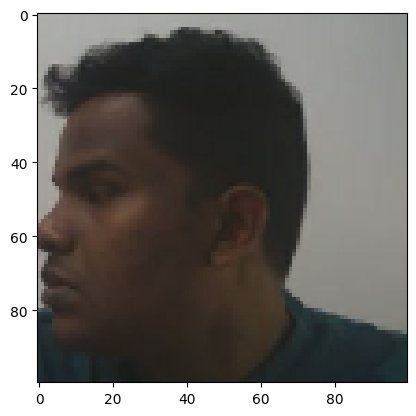

In [88]:
plt.imshow(res[1])

In [89]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [90]:
samples = data.as_numpy_iterator()

In [91]:
len(samples.next())

3

In [109]:
samp = samples.next()

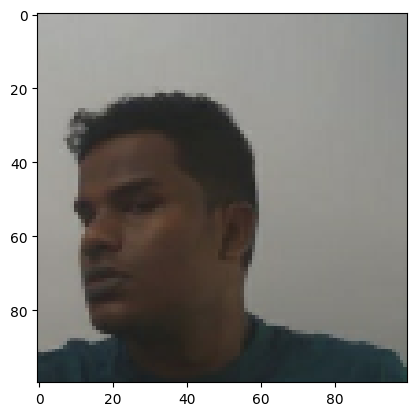

In [110]:
plt.imshow(samp[0])

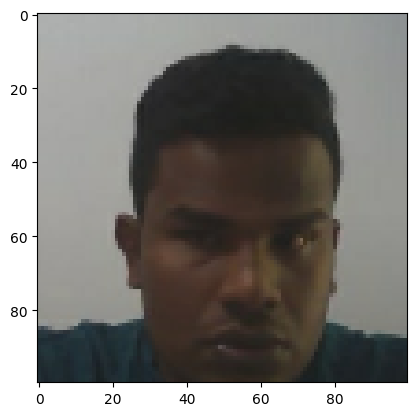

In [111]:
plt.imshow(samp[1])

In [112]:
samp[2]

1.0

In [113]:
# Training partition
# Garbing 70% percentage of data
train_data = data.take(round(len(data)*.7))
# Split the data into smaller chunks (Become more efficient processing)
train_data = train_data.batch(16)
# Allows the model to overlap the pre-processing of data and the training
train_data = train_data.prefetch(8)

In [114]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [124]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [118]:
train_sample = train_data.as_numpy_iterator()

In [119]:
train_sample = train_sample.next()

In [256]:
len(train_sample[0])

16

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*.7)) # Skip the 420 observations
test_data = test_data.take(round(len(data)*.3)) # Take the last 30%
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# **4. Model Engineering**

**4.1 Build Embedding Layer**

In [129]:
inp = Input(shape=(100,100,3), name='input_image')

In [130]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [133]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [135]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [143]:
c3 = Conv2D(128, (4,4), activation='relu')(m2) 
m3 = MaxPooling2D(64, (2,2), padding='same')(c3) 

In [146]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [151]:
f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [152]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [155]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 128)       26

In [150]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image') # (100x100)
    
    # First block 
    c1 = Conv2D(64, (10,10), activation='relu')(inp) # Convolution layer (91x91)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1) # Max pooling layer (46x46)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1) # (40x40)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2) # (20x20)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2) # (17x17)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3) # (9x9)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3) # (6x6)
    f1 = Flatten()(c4)  #
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [167]:
embedding = make_embedding()

In [168]:
# Summary of the model
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 17, 17, 128)       26

**4.2 Build Distance Layer**

In [164]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Similarity calculation 
    # this layer what to do when some data is passed to it
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [161]:
l1 = L1Dist()

In [ ]:
# l1(anchor_embedding, validation_embedding)

**4.3 Make Siamese Model**

In [169]:
def make_siamese_model(): 
    
    # Anchor image input
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    #Combine all together
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [173]:
siamese_model = make_siamese_model()

In [174]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# **5. Training**

**5.1 Setup Loss and Optimizer**

In [180]:
# Lose function
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [181]:
# Optimizer
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

**5.2 Establish Checkpoints**

In [182]:
#  Define the saved check point directory 
checkpoint_dir = './training_checkpoints'

# All check points in consistency format(ckpt)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')

#
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

**5.3 Build Train Step Function**

In [183]:
test_batch = train_data.as_numpy_iterator()

In [184]:
batch_1 = test_batch.next()

In [185]:
X = batch_1[:2]

In [186]:
y = batch_1[2]

In [187]:
y

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

In [188]:
@tf.function # Compile a function into a capable TensorFlow graph
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass to siamese model
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    
    return loss

**5.4 Build Training Loop**

In [189]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [190]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        # Defining the progress bar
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            # Update the progress bar
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

**5.5 Train the model**

In [191]:
EPOCHS = 50

In [192]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 669s 24s/step
0.35669723 0.23414634 1.0

 Epoch 2/50
27/27 [==============================] - 668s 25s/step
0.14311689 0.9483568 1.0

 Epoch 3/50
27/27 [==============================] - 658s 24s/step
0.017960425 0.9858491 1.0

 Epoch 4/50
27/27 [==============================] - 633s 23s/step
6.944271e-05 0.9908257 1.0

 Epoch 5/50
27/27 [==============================] - 628s 23s/step
0.0090383785 0.9688889 0.981982

 Epoch 6/50
27/27 [==============================] - 627s 23s/step
0.0076510143 0.98165137 1.0

 Epoch 7/50
27/27 [==============================] - 633s 23s/step
0.021541398 0.9953488 1.0

 Epoch 8/50
27/27 [==============================] - 621s 23s/step
0.06360986 1.0 1.0

 Epoch 9/50
27/27 [==============================] - 627s 23s/step
3.3974793e-06 1.0 1.0

 E

# **6. Evaluate Model**

**6.1 Import Metrics**

In [193]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall
# Precision - Computes the precision of the predictions with respect to the labels.
# Recall - Computes the recall of the predictions with respect to the labels.

**6.2 Make Predictions**

In [ ]:
# Get a batch of test data (Effective for labels)
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [228]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 3s 3s/step


array([[1.8404110e-08],
       [9.9956822e-01],
       [3.6638735e-07],
       [9.9977994e-01],
       [1.0000000e+00],
       [1.9951013e-07],
       [3.4215939e-06],
       [9.9821389e-01],
       [1.0000000e+00],
       [9.9864054e-01],
       [1.0000000e+00],
       [7.5051628e-07],
       [9.9998647e-01],
       [1.2770477e-07],
       [9.9960703e-01],
       [2.6312495e-07]], dtype=float32)

In [229]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In [230]:
y_true

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.],
      dtype=float32)

**6.3 Calculate Metrics**

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [232]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

**6.4 Visualization Results**

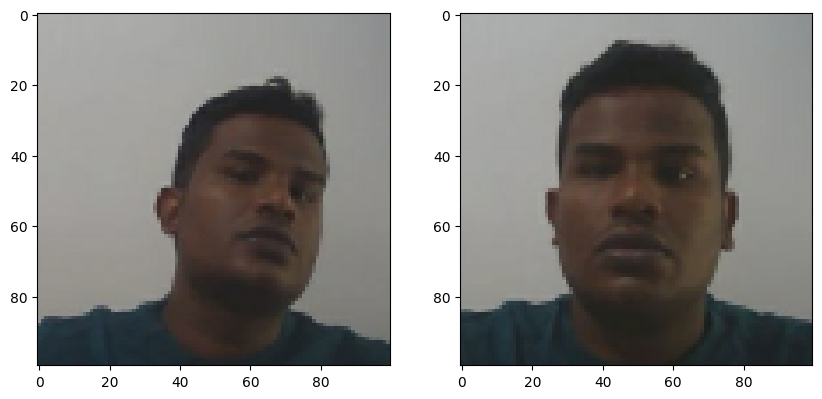

In [234]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[1])

# Renders cleanly
plt.show()

# **7. Save Model**

In [235]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [237]:
L1Dist

__main__.L1Dist

In [236]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodel.h5', custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy}) # Load the custom objects

In [238]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 3s 3s/step


array([[1.8404110e-08],
       [9.9956822e-01],
       [3.6638735e-07],
       [9.9977994e-01],
       [1.0000000e+00],
       [1.9951013e-07],
       [3.4215939e-06],
       [9.9821389e-01],
       [1.0000000e+00],
       [9.9864054e-01],
       [1.0000000e+00],
       [7.5051628e-07],
       [9.9998647e-01],
       [1.2770477e-07],
       [9.9960703e-01],
       [2.6312495e-07]], dtype=float32)

In [239]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# **8. Real Time Test**

**8.1 Verification Function**

In [240]:
os.listdir(os.path.join('application_data', 'verification_images'))

['05c48ede-bf25-11ed-93f8-3c2c30ba9cd2.jpg',
 '06b840f4-bf25-11ed-9167-3c2c30ba9cd2.jpg',
 '06d1f75a-bf25-11ed-87b3-3c2c30ba9cd2.jpg',
 '06e4f70a-bf25-11ed-9957-3c2c30ba9cd2.jpg',
 '06ebec22-bf25-11ed-b76a-3c2c30ba9cd2.jpg',
 '0a1696f7-bf25-11ed-96bc-3c2c30ba9cd2.jpg',
 '0a43b2c8-bf25-11ed-a19d-3c2c30ba9cd2.jpg',
 '0a66b934-bf25-11ed-a17c-3c2c30ba9cd2.jpg',
 '0a8a41b5-bf25-11ed-951e-3c2c30ba9cd2.jpg',
 '0aa8a18e-bf25-11ed-8c78-3c2c30ba9cd2.jpg',
 '0ad0f302-bf25-11ed-a2ab-3c2c30ba9cd2.jpg',
 '0afe2857-bf25-11ed-88cb-3c2c30ba9cd2.jpg',
 '0ed771c4-bf25-11ed-a857-3c2c30ba9cd2.jpg',
 '0ee30db0-bf25-11ed-a77a-3c2c30ba9cd2.jpg',
 '18001696-bf25-11ed-a929-3c2c30ba9cd2.jpg',
 '19059582-bf25-11ed-8d82-3c2c30ba9cd2.jpg',
 '19516279-bf25-11ed-a0bc-3c2c30ba9cd2.jpg',
 '19a227c0-bf25-11ed-8a79-3c2c30ba9cd2.jpg',
 '19ca6ad5-bf25-11ed-9195-3c2c30ba9cd2.jpg',
 '19f75438-bf25-11ed-abc7-3c2c30ba9cd2.jpg',
 '1a1ae33e-bf25-11ed-9771-3c2c30ba9cd2.jpg',
 '1a3dc108-bf25-11ed-9696-3c2c30ba9cd2.jpg',
 '20a24844

In [242]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediction is considered positive
    # Determines how many positive predictions are actually surpassing this detection threshold
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold

    return results, verified
    

**8.2 OpenCV Real Time Verification**

In [252]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 266ms/step
True


In [254]:
np.sum(np.squeeze(results) > 0.9)

40